<a href="https://colab.research.google.com/github/sh4r-KO/SchoolWork/blob/main/DeepLearning_PokemonClassification_Aguirre_Cabrolipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## let's check the data

Text(0.5, 1.0, 'Fourth')

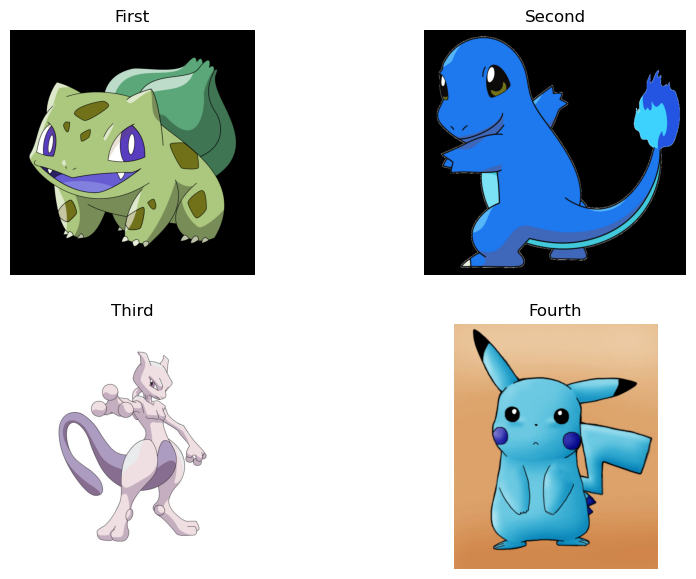

In [ ]:
#%pip install opencv-python
import cv2
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 7))

rows = 2
columns = 2


Image1 = cv2.imread('dataset/PokemonTrainData/Bulbasaur/00000000.png')
Image2 = cv2.imread('dataset/PokemonTrainData/Charmander/00000000.png')
Image3 = cv2.imread('dataset/PokemonTrainData/Mewtwo/00000000.jpg')
Image4 = cv2.imread('dataset/PokemonTrainData/Pikachu/00000000.jpg')
Image5 = cv2.imread('dataset/PokemonTrainData/Squirtle/00000000.png')

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.axis('off')
plt.title("First")

fig.add_subplot(rows, columns, 2)

plt.imshow(Image2)
plt.axis('off')
plt.title("Second")

fig.add_subplot(rows, columns, 3)

plt.imshow(Image3)
plt.axis('off')
plt.title("Third")

fig.add_subplot(rows, columns, 4)

plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")


In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
#from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
#from keras.callbacks import ModelCheckpoint
#from keras.utils import plot_model

#from Model import CNN
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'  # set Graphviz path

path = r'C:\Users\aguir\Downloads\Pokemon_Classification-master (2)\Pokemon_Classification-master\dataset\PokemonTrainData'  # Path to directory which contains classes
classes = os.listdir(path)
print(classes)


images = []
labels = []
imagesize = (128,128,3)




for c in classes:
    dir_path = os.path.join(path, c)
    label = classes.index(c)

    # Reading, resizing and adding image and label to lists
    for i in os.listdir(dir_path):
        image = cv.imread(os.path.join(dir_path, i))
        try:
            resized = cv.resize(image, (imagesize[1], imagesize[0]))  # Resizing images
            images.append(resized)
            labels.append(label)

        except:
            print(os.path.join(dir_path, i), '[ERROR] can\'t read the file')
            continue

print(len(images))
print(images[0])
print(labels[0])


['Bulbasaur', 'Charmander', 'Mewtwo', 'Pikachu', 'Squirtle']
1089
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
0


1089
2


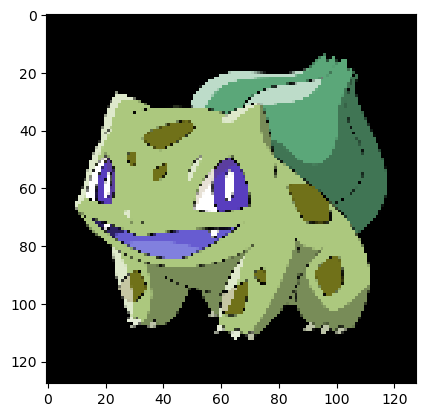

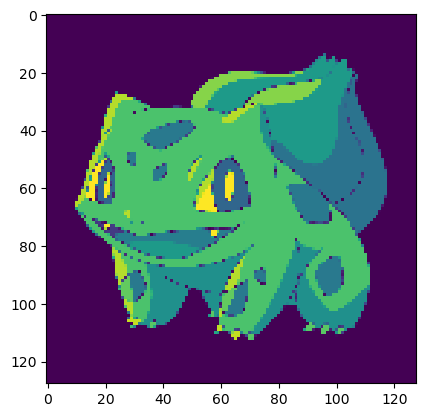

In [ ]:
print(len(images))
print(labels[500])

from matplotlib import pyplot as plt
plt.imshow(images[0], interpolation='nearest')
plt.show()

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(images[0])
plt.imshow(gray, interpolation='nearest')
plt.show()
#https://saturncloud.io/blog/how-to-convert-an-image-to-grayscale-using-numpy-arrays-a-comprehensive-guide/

In [ ]:
images = np.array(images, dtype="float") / 255.0
labels = to_categorical(labels, num_classes=len(classes))

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)#,stratify=labels, shuffle=True,random_state=35)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255,validation_split=0.2)

                             #rotation_range=45,
                             #zoom_range=0.2,
                             #horizontal_flip=True,
                             #width_shift_range=0.15,
                             #height_shift_range=0.15,
                             #shear_range=0.2)
datagen.fit(X_train)


In [ ]:
# Model
# import the necessary packages
from keras.models import Sequential
from keras.layers import ELU, PReLU, LeakyReLU
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dropout,Dense
#from keras.layers.convolutional import
#from keras.layers.core import Activation
#from keras.layers.core import Flatten
#from keras.layers.core import Dropout
#from keras.layers.core import Dense

model2 = Sequential()
inputShape = (128, 128, 3)

model2.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Flatten())

model2.add(Dense(units=5, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

C:\Users\aguir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 42, 42, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 42, 42, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,957 (85.77 KB)

 Trainable params: 21,957 (85.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Étape 5 : Évaluer le modèle après l'entraînement
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.3657 - loss: 1.4418 - val_accuracy: 0.7523 - val_loss: 0.7613
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.7591 - loss: 0.6549 - val_accuracy: 0.7248 - val_loss: 0.7895
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8233 - loss: 0.4556 - val_accuracy: 0.8624 - val_loss: 0.4929
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9273 - loss: 0.2950 - val_accuracy: 0.8716 - val_loss: 0.4704
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9166 - loss: 0.2836 - val_accuracy: 0.8394 - val_loss: 0.5552
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9073 - loss: 0.2630 - val_accuracy: 0.8853 - val_loss: 0.4321
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9358 - loss: 0.2101 - val_accuracy: 0.8945 - val_loss: 0.4056
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9478 - loss: 0.1800 - val_accuracy: 0.9083 - v

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import cv2 as cv
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
#from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
#from keras.callbacks import ModelCheckpoint
#from keras.utils import plot_model

#from Model import CNN
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'  # set Graphviz path

path = r'C:\Users\aguir\Downloads\Pokemon_Classification-master (2)\Pokemon_Classification-master\dataset\PokemonTestData'  # Path to directory which contains classes
classes = os.listdir(path)
print(classes)


images = []
labels = []
imagesize = (128,128,3)

for c in classes:
    dir_path = os.path.join(path, c)
    label = classes.index(c)

    # Reading, resizing and adding image and label to lists
    for i in os.listdir(dir_path):
        image = cv.imread(os.path.join(dir_path, i))
        try:
            resized = cv.resize(image, (imagesize[1], imagesize[0]))  # Resizing images
            images.append(resized)#X
            labels.append(label)#Y

        except:
            print(os.path.join(dir_path, i), '[ERROR] can\'t read the file')
            continue

images_test = np.array(images, dtype="float") / 255.0
labels_test = to_categorical(labels, num_classes=len(classes))

labels_pred = model2.predict(images_test)

labels_pred = np.argmax(labels_pred, axis=1)
labels_test = np.argmax(labels_test, axis=1)

# finding accuracy from the confusion matrix.
cm_kFold = confusion_matrix(labels_test, labels_pred)
print(cm_kFold)

print()
report_dict = classification_report(labels_test, labels_pred,output_dict=True)
pd.DataFrame(report_dict)

['Bulbasaur', 'Charmander', 'Mewtwo', 'Pikachu', 'Squirtle']
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[35  0  0  0  1]
 [ 0 45  0  0  1]
 [ 0  0 48  0  1]
 [ 0  0  0 57  0]
 [ 0  0  0  0 47]]



,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,1.000000,1.000000,1.000000,1.0,0.940000,0.987234,0.988000,0.988000
recall,0.972222,0.978261,0.979592,1.0,1.000000,0.987234,0.986015,0.987234
f1-score,0.985915,0.989011,0.989691,1.0,0.969072,0.987234,0.986738,0.987356
support,36.000000,46.000000,49.000000,57.0,47.000000,0.987234,235.000000,235.000000
